## Final Lab Project Of **Data Minning** on **Heart Failure** **Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df['Heart Disease'] = [0 if x == 'Absence' else 1 for x in df['Heart Disease']]
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


<ipython-input-21-1fe7ebff31e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart Disease'])


<Axes: xlabel='Heart Disease', ylabel='Density'>

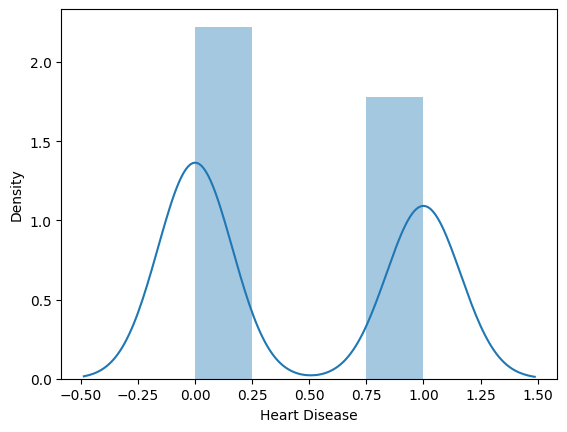

In [ ]:
sns.distplot(df['Heart Disease'])

In [ ]:
X = df.drop('Heart Disease', 1)
y = df['Heart Disease']

<ipython-input-22-a9f36847acfd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Heart Disease', 1)


In [ ]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
46,49,1,3,118,149,0,2,126,0,0.8,1,3,3
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3
195,55,0,2,135,250,0,2,161,0,1.4,2,0,3
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7
215,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,55,1,4,140,217,0,0,111,1,5.6,3,0,7
123,65,0,3,160,360,0,2,151,0,0.8,1,0,3
15,71,0,4,112,149,0,0,125,0,1.6,2,0,3
125,54,0,3,160,201,0,0,163,0,0.0,1,1,3


In [ ]:
y_train

75     1
209    0
289    0
187    1
20     0
      ..
156    0
123    0
15     1
125    0
265    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [ ]:
X_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
111,41,1,2,110,235,0,0,153,0,0.0,1,0,3
170,69,1,1,160,234,1,2,131,0,0.1,2,1,3
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3
105,48,1,4,124,274,0,2,166,0,0.5,2,0,7
121,54,1,4,122,286,0,2,116,1,3.2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,51,1,3,94,227,0,0,154,1,0.0,1,1,7
250,54,1,4,120,188,0,0,113,0,1.4,2,1,7
69,47,1,3,108,243,0,0,152,0,0.0,1,0,3
58,59,0,4,174,249,0,0,143,1,0.0,2,0,3


In [ ]:
y_test

111    0
170    0
106    0
105    1
121    1
      ..
217    0
250    1
69     1
58     1
194    0
Name: Heart Disease, Length: 81, dtype: int64

##**Algorithms**

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-0.00348697,  0.13864448,  0.08003809,  0.00067311,  0.00080752,
       -0.10664794,  0.0424282 , -0.00257793,  0.08145668,  0.04994916,
        0.06002956,  0.12248627,  0.07339417])

In [ ]:
X.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [ ]:
lm.score(X_test,y_test)

0.4396099957794818

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([ 3.09517921e-02,  1.08560172e-01,  2.86095827e-01,  6.37460249e-01,
        9.21494050e-01,  9.43955204e-01,  1.36018450e-01,  1.13727766e+00,
       -1.76367531e-01,  8.02987494e-01,  1.05372598e+00,  4.37626810e-01,
        8.73062573e-01,  3.22259585e-01,  7.12676335e-02,  8.41984906e-01,
        9.08926093e-01,  6.85244550e-01,  5.02240202e-01,  7.89321541e-01,
        2.51182298e-02,  3.56287374e-01,  9.15938328e-01,  1.11939463e+00,
        2.95353717e-01,  3.26037227e-01,  6.90691074e-01,  3.13609509e-01,
        6.33223280e-01,  7.33768451e-01,  8.80385559e-02,  6.57833965e-01,
        2.71622561e-01,  2.38065079e-01,  3.29874480e-01,  1.13352213e-01,
        5.78468177e-01,  7.61376603e-01,  1.55968136e-01,  3.57744431e-01,
        3.14132319e-01,  8.73812684e-01,  5.97729699e-01,  2.11014282e-01,
        1.00543724e-01,  2.17700468e-01,  3.59523830e-01,  1.05888271e+00,
        8.42852217e-02,  2.89176459e-01,  6.37524715e-01,  1.18845420e-01,
        6.10861595e-01,  

In [ ]:
y_test

111    0
170    0
106    0
105    1
121    1
      ..
217    0
250    1
69     1
58     1
194    0
Name: Heart Disease, Length: 81, dtype: int64

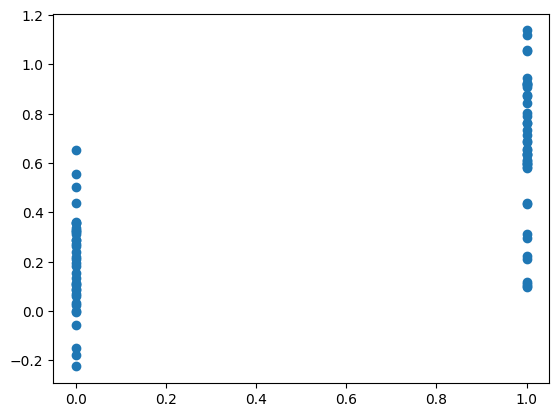

In [ ]:
plt.scatter(y_test,predictions)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logmodel.score(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_test.shape

(81,)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        38
           1       0.94      0.77      0.85        43

    accuracy                           0.85        81
   macro avg       0.86      0.86      0.85        81
weighted avg       0.87      0.85      0.85        81



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[36  2]
 [10 33]]


In [ ]:
logmodel.score(X_test,y_test)

0.8518518518518519

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        38
           1       0.74      0.74      0.74        43

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



In [ ]:
print(confusion_matrix(y_test,predictions))

[[27 11]
 [11 32]]


In [ ]:
dtc.score(X_test,y_test)

0.7283950617283951

Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[35  3]
 [14 29]]


In [ ]:
rfc.score(X_test,y_test)

0.7901234567901234

In [ ]:
print(rfc.predict([[40,	1,	4,	110,	167,	0,	2,	114,	1,	2.0,	2,	0,	7]]))
if rfc.predict == 0:
  print ("'0' Absence")
else:
  print ("'1' Presence")

[1]
'1' Presence


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

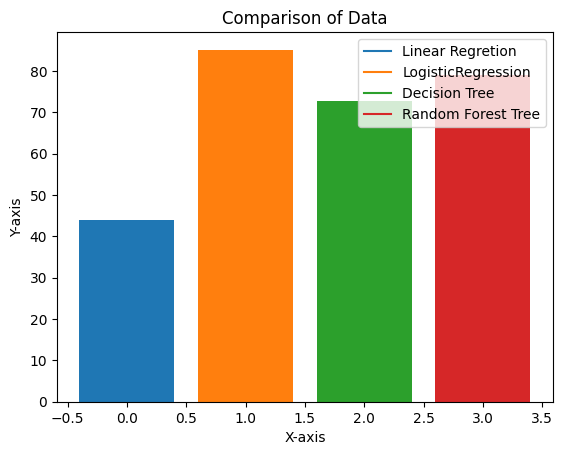

In [ ]:
plt.plot(43.9, label='Linear Regretion')
plt.plot(85.1, label='LogisticRegression')
plt.plot(72.8, label='Decision Tree')
plt.plot(79, label='Random Forest Tree')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparison of Data')
plt.bar(0,43.9)
plt.bar(1,85.1)
plt.bar(2,72.8)
plt.bar(3,79)
plt.show()